In [41]:
import numpy as np
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam


(x_train, y_train), (x_test, y_test) = mnist.load_data()
from skimage import color, transform

def preprosses(images):
    num_samples = len(images)
    resized_images = np.zeros((num_samples, 75, 75, 3), dtype=np.float32)

    for i in range(num_samples):
        img = transform.resize(images[i], (75, 75))
        img_rgb = color.gray2rgb(img)
        resized_images[i] = img_rgb

    return resized_images

x_train_resized = preprosses(x_train)
x_test_resized = preprosses(x_test)



x_train_resized = x_train_resized / 255.0
x_test_resized = x_test_resized / 255.0


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train.shape)
print(y_test.shape)

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_resized, y_train, epochs=5, batch_size=32, validation_data=(x_test_resized, y_test))


(60000, 10)
(10000, 10)


Epoch 1/5
1875/1875 [==============================] - 1176s 623ms/step - loss: 0.1580 - accuracy: 0.9585 - val_loss: 0.0384 - val_accuracy: 0.9896
Epoch 2/5
1875/1875 [==============================] - 1139s 607ms/step - loss: 0.0429 - accuracy: 0.9884 - val_loss: 0.0282 - val_accuracy: 0.9920
Epoch 3/5
1875/1875 [==============================] - 1162s 620ms/step - loss: 0.0239 - accuracy: 0.9937 - val_loss: 0.0398 - val_accuracy: 0.9898
Epoch 4/5
1875/1875 [==============================] - 1147s 612ms/step - loss: 0.0154 - accuracy: 0.9957 - val_loss: 0.0188 - val_accuracy: 0.9947
Epoch 5/5
1875/1875 [==============================] - 1139s 608ms/step - loss: 0.0125 - accuracy: 0.9965 - val_loss: 0.0154 - val_accuracy: 0.9949


In [42]:
pred = model.predict(x_test_resized)


313/313 [==============================] - 36s 94ms/step


In [33]:
print(pred.shape)

(10000, 10)


In [34]:
print(y_test.shape)

(10000, 10)


In [35]:
pred = np.argmax(pred, axis=1)
y_test = np.argmax(y_test, axis=1)
print(pred.shape)
print(y_test.shape)

(10000,)
(10000,)


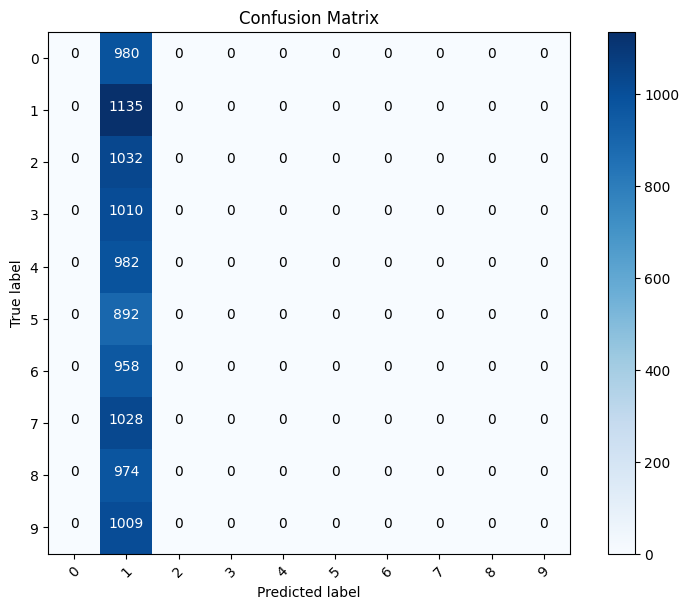

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np


cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()


classes = np.unique(np.concatenate((y_test, pred)))
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()